In [45]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math
import sys
import os
sys.path.append('..\\src') #pongo los 2 puntos para que salga de la carpeta
import soporte_funciones as sf
# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
pd.set_option('display.max_columns', None)

# EDA

## Primera exploración

In [46]:
df = pd.read_csv('..\\datos\\api_rent_madrid.csv', sep = ';')
df.head()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.0,chalet,rent,371.0,False,6,3,Numancia de la Sagra,Toledo,Numancia de la Sagra,es,400.675.955,-38.225.891,False,40116,UGENA VILLAGE INMOBILIARIA GESTIONA en exclusi...,False,good,False,1.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Numancia de la Sagra', 'title': ...",False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,Madrid,es,404.646.164,-36.489.179,True,7037,LOFT DE DISEÑO. Orientación Este. Muy soleado ...,False,good,False,13.0,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",False,False,False,False,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,21,750.0,flat,rent,70.0,True,2,1,Gregorio izquierdo,Madrid,San Sebastián de los Reyes,es,405.500.865,-36.278.085,False,16145,"Estupendo piso muy iluminado, recientemente re...",True,good,False,11.0,{'typology': 'flat'},"{'subtitle': 'Centro Urbano, San Sebastián de ...",True,False,False,False,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
3,98621753,28,400.0,penthouse,rent,67.0,True,2,2,Calle Madrid,Madrid,Villamanrique de Tajo,es,40.069.197,-3.241.383,False,55041,"A estrenar ático con piscina en Calle Madrid, ...",False,good,False,6.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Villamanrique de Tajo', 'title':...",False,False,True,False,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN
4,98222714,22,450.0,flat,rent,89.0,False,2,1,Calle Arroyo,Toledo,Recas,es,400.536.974,-39.912.159,False,47186,REDPISO alquila esta vivienda situada en el mu...,False,good,False,5.0,{'typology': 'flat'},"{'subtitle': 'Recas', 'title': 'Piso en Calle ...",False,False,False,False,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


Tenemos 450 datos, 38 columnas

In [47]:
df.shape

(450, 38)

Una media de precio de 700 euros, una mínima de 340 y una máxima de 750.

In [48]:
df.describe()

,propertyCode,numPhotos,price,size,rooms,bathrooms,distance,priceByArea
count,4.500000e+02,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,432.000000
mean,9.463515e+07,21.900000,671.797778,68.237778,1.700000,1.213333,22455.771111,11.863426
std,1.385817e+07,9.670346,85.100603,35.662557,0.970041,0.441500,17001.691666,5.360971
min,6.666960e+05,0.000000,340.000000,20.000000,0.000000,1.000000,183.000000,1.000000
25%,9.756495e+07,15.000000,640.000000,47.250000,1.000000,1.000000,7104.250000,8.000000
50%,9.866032e+07,21.000000,700.000000,62.000000,2.000000,1.000000,20294.000000,11.000000
75%,9.889432e+07,28.000000,740.000000,80.000000,2.000000,1.000000,34979.750000,15.000000
max,9.893968e+07,72.000000,750.000000,371.000000,6.000000,3.000000,59919.000000,33.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            450 non-null    int64  
 1   numPhotos               450 non-null    int64  
 2   price                   450 non-null    float64
 3   propertyType            450 non-null    object 
 4   operation               450 non-null    object 
 5   size                    450 non-null    float64
 6   exterior                450 non-null    bool   
 7   rooms                   450 non-null    int64  
 8   bathrooms               450 non-null    int64  
 9   address                 450 non-null    object 
 10  province                450 non-null    object 
 11  municipality            450 non-null    object 
 12  country                 450 non-null    object 
 13  latitude                450 non-null    object 
 14  longitude               450 non-null    ob

Tengo nulos presentes en varias categorías. En unas, pocoso nulos pero en otras hay muchos, por ejemplo: labels, newDevelopmentFinished.

In [50]:
df.isna().sum()

propertyCode                0
numPhotos                   0
price                       0
propertyType                0
operation                   0
size                        0
exterior                    0
rooms                       0
bathrooms                   0
address                     0
province                    0
municipality                0
country                     0
latitude                    0
longitude                   0
showAddress                 0
distance                    0
description                 1
hasVideo                   18
status                     18
newDevelopment             18
priceByArea                18
detailedType               18
suggestedTexts             18
hasPlan                    18
has3DTour                  18
has360                     18
hasStaging                 18
superTopHighlight          18
topNewDevelopment          18
externalReference         105
floor                      84
district                  112
neighborho

Con el nunique puedo darme cuenta de algunas columnas que, en realidad no aportan nada, como operation o country ya que tienen un único valor.

Para el caso de operation, hace sentido que sea solo único ya que todos son pisos de alquiler. Country, por igual, hace referencia a un único país por lo que no vale la pena mantenerla.

Las demás sigo explorando.

In [51]:
df.nunique()

propertyCode              442
numPhotos                  49
price                      63
propertyType                6
operation                   1
size                      103
exterior                    2
rooms                       6
bathrooms                   3
address                   405
province                    5
municipality               96
country                     1
latitude                  433
longitude                 433
showAddress                 2
distance                  430
description               427
hasVideo                    2
status                      3
newDevelopment              2
priceByArea                31
detailedType               10
suggestedTexts            395
hasPlan                     2
has3DTour                   2
has360                      2
hasStaging                  1
superTopHighlight           1
topNewDevelopment           1
externalReference         335
floor                      13
district                   96
neighborho

In [52]:
df[df.duplicated()]

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
253,98068981,19,692.0,flat,rent,83.0,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,8.0,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT02,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
254,98069014,19,670.0,flat,rent,79.0,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,8.0,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT07,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
255,98288656,14,609.0,flat,rent,56.0,True,1,1,"Calle Álvaro Mutis, 1",Madrid,Alcalá de Henares,es,405.126.166,-33.694.194,True,30186,Vivienda adaptada. Certificado 33% de minusval...,False,newdevelopment,True,11.0,{'typology': 'flat'},"{'subtitle': 'Espartales, Alcalá de Henares', ...",True,False,False,False,False,False,VT3,bj,Espartales,NaN,True,NaN,NaN,True
256,98069020,19,718.0,flat,rent,86.0,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,8.0,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT06,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
300,98889734,48,470.0,flat,rent,80.0,False,1,1,Fuensalida,Toledo,Fuensalida,es,400.493.725,-42.105.716,False,59351,ESPECTACULAR PISO DE UN DORMITORIO TOTALMENTE ...,False,good,False,6.0,{'typology': 'flat'},"{'subtitle': 'Fuensalida', 'title': 'Piso'}",False,False,False,False,False,False,NaN,1,NaN,NaN,True,NaN,NaN,NaN
301,98911140,23,750.0,flat,rent,109.0,True,2,2,Hospital,Madrid,Valdemoro,es,401.969.978,-36.896.474,False,24455,Características de la vivienda: urbanización p...,False,good,False,7.0,{'typology': 'flat'},"{'subtitle': 'Hospital, Valdemoro', 'title': '...",False,False,False,False,False,False,Pisoalquileragatha,3,Hospital,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
302,98913105,24,550.0,flat,rent,76.0,True,2,1,Yuncos,Toledo,Yuncos,es,400.947.108,-38.715.189,False,38544,IBC Alquila piso amueblado en zona centro de Y...,False,good,False,7.0,{'typology': 'flat'},"{'subtitle': 'Yuncos', 'title': 'Piso'}",False,False,False,False,False,False,5421,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
350,95224372,32,400.0,flat,rent,100.0,True,3,2,Cabañas de la Sagra,Toledo,Cabañas de la Sagra,es,40.009.603,-39.515.398,False,49933,INMOBILIARIA BUY HOUSE COMERCIALIZA PRECIOSO P...,False,good,False,4.0,{'typology': 'flat'},"{'subtitle': 'Cabañas de la Sagra', 'title': '...",True,False,False,False,False,False,3978-1,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


In [53]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

Después de cargarme los duplicados, me quedan 442 casas.

In [54]:
sf.exploracion_dataframe(df, 'price')

El número de datos es 442 y el de columnas es 38

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
description,0.226244
hasVideo,4.072398
status,4.072398
newDevelopment,4.072398
priceByArea,4.072398
detailedType,4.072398
suggestedTexts,4.072398
hasPlan,4.072398
has3DTour,4.072398
has360,4.072398



 ..................... 

Los tipos de las columnas son:


,tipo_dato
propertyCode,int64
numPhotos,int64
price,float64
propertyType,object
operation,object
size,float64
exterior,bool
rooms,int64
bathrooms,int64
address,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna propertyType tiene las siguientes valore únicos:


,count
propertyType,
flat,348
studio,48
duplex,19
penthouse,16
chalet,9
countryHouse,2


La columna operation tiene las siguientes valore únicos:


,count
operation,
rent,442


La columna address tiene las siguientes valore únicos:


,count
address,
"Calle Valle de Ambles, 2",7
El Quiñón,4
Calle de Honduras,3
Calle de Sáhara,3
Calle de Rocafort,2
...,...
Calle Isaac Albéniz,1
Calle de la Gavia Seca,1
Calle de Villajoyosa,1


La columna province tiene las siguientes valore únicos:


,count
province,
Madrid,353
Toledo,59
Guadalajara,21
Segovia,8
Ávila,1


La columna municipality tiene las siguientes valore únicos:


,count
municipality,
Madrid,170
Alcalá de Henares,22
Parla,14
Seseña,14
Aranjuez,11
...,...
Los Santos de la Humosa,1
Mataelpino,1
Los Molinos,1


La columna country tiene las siguientes valore únicos:


,count
country,
es,442


La columna latitude tiene las siguientes valore únicos:


,count
latitude,
404.430.651,7
403.809.876,2
403.082.527,2
402.003.307,2
400.493.725,1
...,...
404.626.558,1
403.782.048,1
403.566.848,1


La columna longitude tiene las siguientes valore únicos:


,count
longitude,
-34.659.877,7
-36.338.528,2
-37.365.244,2
-36.919.489,2
-42.105.716,1
...,...
-34.833.464,1
-3.618.842,1
-36.899.208,1


La columna description tiene las siguientes valore únicos:


,count
description,
"VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar con Qube! Alquila tu nueva casa en Torrejón de Ardoz SIN GASTOS DE AGENCIA, NI COMISIONES. Qube Torrejón es un residencial de obra nueva ubicado en Torrejón de Ardoz compuesto por 36 viviendas de Protección de Precio Limitado. Todas las viviendas cuentan con 2 dormitorios, 2 baños, trastero y 1 o 2 plazas de garaje incluido en el precio. El Precio NO incluye los gastos de comunidad, tasas e impuestos vinculados a la vivienda. El edificio cuenta con ascensor, servicio de conserjería, zonas comunes con piscina en mancomunidad, zona chill out en cubierta y sala gastrobar para que toda la familia pueda disfrutar de todas las comodidades que presentan las comunidades Qube. Las viviendas Qube llevan suelo radiante refrescante centralizado mediante aerotermia. Además, cuentan con la mayor calificación energética A con lo que se reduce el consumo energético y lo podrás comprobar en la factura de los consumos. Todos los pisos tienen cocina amueblada equipada con vitrocerámica de inducción, campana decorativa y horno. Los cuartos de baño cuentan con ducha y bañera, mampara, accesorios de baño, espejo y mueble. El resto de la vivienda no está amueblado. Además, las viviendas están dotadas de luminarias en la totalidad de las estancias. ¿Qué necesitas para poder disfrutar de una vivienda Qube? 1 mes de fianza Seguro de hogar a la firma de contrato. Contrato indefinido de más de 1 año de antigüedad. Si no cumples con esta condición se requerirá un avalista adicional. ¡IMPORTANTE! Qube Torrejón es una promoción de “Protección de Precio Limitado en Régimen de Alquiler”, por el decreto 74/2009, podrás optar por el piso que más te guste si cumples los requisitos de acceso de la Comunidad de Madrid, incluido uno de los disponibles adaptado para personas con movilidad que presenten su certificado de discapacidad. Si tienes cualquier duda acerca de las condiciones puedes visitar nuestra web o llamarnos, te responderemos encantados.",7
"PROMOCIÓN: 1 MES DE ALQUILER GRATIS si reservas antes del 30 de septiembre. Y además, ¡sin comisiones de agencia. Piso de 60 m² en alquiler de 3 dormitorios situado en la localidad de Parla, provincia de Madrid. La vivienda dispone de buenas comunicaciones, próxima a paradas de autobús con la línea 461, a la parada de TRAM y con los accesos a la localidad mediante las carreteras M-408 y M-410. La zona dispone de equipamiento variado, centro de salud, centro comercial, farmacia, oficina de correos, oficina bancaria y restaurantes. Construido en 1979 este piso tiene una superficie de 60 y se distribuye en salón-comedor, 3 dormitorios con armarios empotrados, cocina amueblada con armarios altos y bajos y equipada con horno, vitrocerámica y campana extractora y 1 baño, listo para convertirse en su próxima vivienda en alquiler. Con nuestros servicios podrá encontrar la vivienda que necesita. Empiece ahora mismo pidiendo más información. Un responsable cercano a usted le atenderá personalmente. Promoción válida para contratos firmados antes de 30 de septiembre del 2022 (incluido). Esta promoción no es acumulable. Condiciones válidas para inmuebles identificados en webs y portales con detalle promocional de campaña identificado en descriptivo del anuncio.",2
"Nuevo curso, nuevo hogar ¡con hasta 1 MES GRATIS y SIN COMISIÓN DE AGENCIA en tu alquiler! Amplia y luminosa vivienda de dos dormitorios, en un entorno tranquilo, con todos los servicios a tu alcance. *Es condición esencial permanecer en la vivienda al menos 12 meses, de no ser así la promoción quedará sin efectos con carácter retroactivo, viniendo obligado a devolver los importes mensuales de la promoción que se haya beneficiado ¡ALTA DE SUMINISTROS GRATIS! Disfruta de tu hogar desde el primer momento, Testa Home te ayuda en la gestión del alta de suministros de manera gratuita, con lo que podrás ahorrar hasta 330 € por el alta de la luz y el gas. *Para una vivienda con gasto promedio de 4,4 KWh ¡VIVIE

La columna hasVideo tiene las siguientes valore únicos:


,count
hasVideo,
False,306
True,118


La columna status tiene las siguientes valore únicos:


,count
status,
good,409
newdevelopment,13
renew,2


La columna newDevelopment tiene las siguientes valore únicos:


,count
newDevelopment,
False,411
True,13


La columna detailedType tiene las siguientes valore únicos:


,count
detailedType,
{'typology': 'flat'},336
"{'typology': 'flat', 'subTypology': 'studio'}",46
"{'typology': 'flat', 'subTypology': 'penthouse'}",16
"{'typology': 'flat', 'subTypology': 'duplex'}",15
"{'typology': 'chalet', 'subTypology': 'terracedHouse'}",5
"{'typology': 'chalet', 'subTypology': 'independantHouse'}",2
{'typology': 'chalet'},1
"{'typology': 'countryHouse', 'subTypology': 'countryHouse'}",1
"{'typology': 'chalet', 'subTypology': 'semidetachedHouse'}",1


La columna suggestedTexts tiene las siguientes valore únicos:


,count
suggestedTexts,
"{'subtitle': 'Suroeste, Torrejón de Ardoz', 'title': 'Piso en Calle Valle de Ambles, 2'}",7
"{'subtitle': 'El Quiñón, Seseña', 'title': 'Piso'}",4
"{'subtitle': 'Las Sedas - El Olivar, Alcalá de Henares', 'title': 'Piso en Calle de Honduras'}",3
"{'subtitle': 'Los Rosales, Madrid', 'title': 'Piso en Calle de Sáhara'}",3
"{'subtitle': 'Villa del Prado', 'title': 'Ático en Calle Hortensia'}",2
...,...
"{'subtitle': 'Noroeste, Torrejón de Ardoz', 'title': 'Piso en Calle Madrid'}",1
"{'subtitle': 'Casco Histórico de Vallecas, Madrid', 'title': 'Piso en Calle de la Gavia Seca'}",1
"{'subtitle': 'Los Rosales, Madrid', 'title': 'Piso en Calle de Villajoyosa'}",1


La columna hasPlan tiene las siguientes valore únicos:


,count
hasPlan,
False,293
True,131


La columna has3DTour tiene las siguientes valore únicos:


,count
has3DTour,
False,418
True,6


La columna has360 tiene las siguientes valore únicos:


,count
has360,
False,337
True,87


La columna hasStaging tiene las siguientes valore únicos:


,count
hasStaging,
False,424


La columna superTopHighlight tiene las siguientes valore únicos:


,count
superTopHighlight,
False,424


La columna topNewDevelopment tiene las siguientes valore únicos:


,count
topNewDevelopment,
False,424


La columna externalReference tiene las siguientes valore únicos:


,count
externalReference,
CG-91792-0001,2
6012-VI-011-008-000-003,2
"3,80811E+11",2
7258340-AL,1
6123,1
...,...
2805-024850-01,1
45-00938,1
2815-001921-04,1


La columna floor tiene las siguientes valore únicos:


,count
floor,
1,94
2,75
bj,67
3,59
4,36
5,11
en,6
8,5
6,4


La columna district tiene las siguientes valore únicos:


,count
district,
Centro,48
Villaverde,23
Puente de Vallecas,17
El Quiñón,13
Tetuán,13
...,...
Juan de Austria,1
Montserrat - Parque Empresarial,1
La Montaña-El Cortijo,1


La columna neighborhood tiene las siguientes valore únicos:


,count
neighborhood,
Lavapiés-Embajadores,11
Villaverde Alto,9
San Diego,8
Valdeacederas,8
Los Rosales,7
...,...
Casco Histórico de Vicálvaro,1
Salvador,1
Timón,1


La columna hasLift tiene las siguientes valore únicos:


,count
hasLift,
True,226
False,185


La columna parkingSpace tiene las siguientes valore únicos:


,count
parkingSpace,
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",130
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 50.0}",1
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 40.0}",1
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 90.0}",1
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}",1


La columna labels tiene las siguientes valore únicos:


,count
labels,
"[{'name': 'apartamentoType', 'text': 'Apartamento'}]",30


La columna newDevelopmentFinished tiene las siguientes valore únicos:


,count
newDevelopmentFinished,
True,8
False,5


Datos Encontrados:

In [55]:
df[df['latitude'] == '404.430.651']

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
245,98068981,19,692.0,flat,rent,83.0,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,8.0,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT02,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
246,98069014,19,670.0,flat,rent,79.0,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,8.0,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT07,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
248,98069020,19,718.0,flat,rent,86.0,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,8.0,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT06,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
249,98068962,19,694.0,flat,rent,81.0,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,9.0,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT04,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
250,98069018,19,658.0,flat,rent,78.0,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,8.0,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT05,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
252,98068997,19,723.0,flat,rent,88.0,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,8.0,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT08,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True
253,98068959,19,728.0,flat,rent,91.0,True,2,2,"Calle Valle de Ambles, 2",Madrid,Torrejón de Ardoz,es,404.430.651,-34.659.877,True,20294,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,False,newdevelopment,True,8.0,{'typology': 'flat'},"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",True,False,False,False,False,False,VT01,NaN,Suroeste,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,True


Encontré los pisos que se encuentran en la misma zona, Torrejón, que forman parte de un condominio.

Columnas a eliminar:
- operation: porque habla sobre el tipo, renta, y al final todos son de alquiler. No hace sentido.
- country: porque todas son de Madrid al final.
- province: porque al final todas son de Madrid, e incluye valores fuera de Madrid. Debo cargarme esos valores, filas, y esa columna.
- description: al final no va a interferir ese texto en mi modelo.
- hasVideo: no me da ninguna información valiosa.
- newDevelopment: porque al final sus valores ya están determinados por su status.
- hasPlan: no me interesa ni aporta.
has3DTour: no me aporta.
- has360: no me aporta.
- hasStaging: no me aporta, todas son falsas.
- superTopHighlights: todas son falsas.
- topNewDevelopment: todas son falsas.
- hasParkingSpace: tiene muchos valores nulos.
- newDevelopmentFinished : apenas tiene 13 valores.

Eliminar datos que no son de Madrid

In [56]:
df = df[df['province'] == 'Madrid']

In [57]:
df.shape

(353, 38)

In [58]:
df.reset_index(drop=True, inplace=True)

Eliminar columnas innecesarias

In [59]:
columnas_eliminar = ['operation', 'province', 'country', 'description',
                    'hasVideo', 'newDevelopment', 'hasPlan', 'has3DTour',
                    'has360','hasStaging', 'superTopHighlight', 
                    'topNewDevelopment', 'parkingSpace','labels',
                    'newDevelopmentFinished', 'numPhotos', 'priceByArea', 'showAddress',
                    'propertyCode', 'suggestedTexts', 
                    'externalReference', 'address', 'latitude', 'longitude', 
                    'detailedType']

In [60]:
df.drop(columns=columnas_eliminar, inplace=True)

In [61]:
df.shape

(353, 13)

In [62]:
df.describe()

,price,size,rooms,bathrooms,distance
count,353.000000,353.000000,353.000000,353.000000,353.000000
mean,692.932011,59.728045,1.543909,1.110482,16698.824363
std,61.307820,23.799745,0.934760,0.322857,13549.504221
min,400.000000,20.000000,0.000000,1.000000,183.000000
25%,650.000000,45.000000,1.000000,1.000000,5656.000000
50%,700.000000,57.000000,2.000000,1.000000,12321.000000
75%,740.000000,70.000000,2.000000,1.000000,26558.000000
max,750.000000,206.000000,4.000000,3.000000,56596.000000


In [63]:
banios_0 = df[df['rooms'] == 0]

In [64]:
banios_0.head()

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,status,floor,district,neighborhood,hasLift
4,684.0,studio,45.0,True,0,1,Madrid,10656,NaN,NaN,NaN,NaN,NaN
8,700.0,studio,28.0,True,0,1,Madrid,5569,good,1,Ciudad Lineal,San Pascual,False
22,750.0,studio,45.0,False,0,1,Madrid,1027,good,bj,Centro,Lavapiés-Embajadores,True
27,750.0,studio,25.0,False,0,1,Madrid,533,good,4,Centro,Chueca-Justicia,True
30,750.0,studio,30.0,True,0,1,Madrid,935,good,3,Centro,Lavapiés-Embajadores,False


Estuve revisando los pisos donde el baño = 0, pero pude comprobar que donde sucede esto es en los estudios.

In [65]:
df.describe(include='O').T

,count,unique,top,freq
propertyType,353,6,flat,277
municipality,353,62,Madrid,170
status,339,3,good,324
floor,290,13,1,70
district,301,83,Centro,47
neighborhood,174,74,Lavapiés-Embajadores,11
hasLift,335,2,True,174


In [66]:
df.isna().sum()

price             0
propertyType      0
size              0
exterior          0
rooms             0
bathrooms         0
municipality      0
distance          0
status           14
floor            63
district         52
neighborhood    179
hasLift          18
dtype: int64

In [67]:
sf.exploracion_dataframe(df, 'price')

El número de datos es 353 y el de columnas es 13

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 1

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
status,3.966006
floor,17.847025
district,14.730878
neighborhood,50.708215
hasLift,5.099150



 ..................... 

Los tipos de las columnas son:


,tipo_dato
price,float64
propertyType,object
size,float64
exterior,bool
rooms,int64
bathrooms,int64
municipality,object
distance,int64
status,object
floor,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna propertyType tiene las siguientes valore únicos:


,count
propertyType,
flat,277
studio,48
duplex,14
penthouse,10
chalet,3
countryHouse,1


La columna municipality tiene las siguientes valore únicos:


,count
municipality,
Madrid,170
Alcalá de Henares,22
Parla,14
Aranjuez,11
Torrejón de Ardoz,11
...,...
Daganzo de Arriba,1
El Álamo,1
Algete,1


La columna status tiene las siguientes valore únicos:


,count
status,
good,324
newdevelopment,13
renew,2


La columna floor tiene las siguientes valore únicos:


,count
floor,
1,70
bj,58
2,56
3,48
4,33
5,9
en,6
8,4
6,2


La columna district tiene las siguientes valore únicos:


,count
district,
Centro,47
Villaverde,23
Puente de Vallecas,17
Tetuán,13
San Blas,12
...,...
Sudeste Industrial,1
Juan de Austria,1
Montserrat - Parque Empresarial,1


La columna neighborhood tiene las siguientes valore únicos:


,count
neighborhood,
Lavapiés-Embajadores,11
Villaverde Alto,9
San Diego,8
Valdeacederas,8
Los Rosales,7
...,...
Casco Histórico de Vicálvaro,1
Salvador,1
Timón,1


La columna hasLift tiene las siguientes valore únicos:


,count
hasLift,
True,174
False,161


Después de un segundo análisis: procedo con los siguientes cambios.

In [68]:
df.drop(columns='neighborhood', inplace=True)

In [69]:
df_status = pd.isna(df["status"])
df.loc[df_status, "status"] = 'Desconocido'

In [71]:
df_floor = pd.isna(df["floor"])
df.loc[df_floor, "floor"] = 'Desconocido'

In [72]:
df_dist = pd.isna(df["district"])
df.loc[df_dist, "district"] = 'Desconocido'

In [73]:
df_hasL = pd.isna(df["hasLift"])
df.loc[df_hasL, "hasLift"] = 'Desconocido'

In [74]:
df.isna().sum()

price           0
propertyType    0
size            0
exterior        0
rooms           0
bathrooms       0
municipality    0
distance        0
status          0
floor           0
district        0
hasLift         0
dtype: int64

In [75]:
df.dtypes

price           float64
propertyType     object
size            float64
exterior           bool
rooms             int64
bathrooms         int64
municipality     object
distance          int64
status           object
floor            object
district         object
hasLift          object
dtype: object

In [76]:
df['rooms'] = df['rooms'].astype('O')
df['bathrooms'] = df['bathrooms'].astype('O')

# Gráficos

In [77]:
df_num, df_cat = sf.separar_dataframe(df)

In [78]:
df_num

,price,size,distance
0,750.0,60.0,7037
1,750.0,70.0,16145
2,400.0,67.0,55041
3,590.0,70.0,56596
4,684.0,45.0,10656
...,...,...,...
348,640.0,69.0,29311
349,700.0,54.0,11656
350,700.0,59.0,7529
351,700.0,75.0,30359


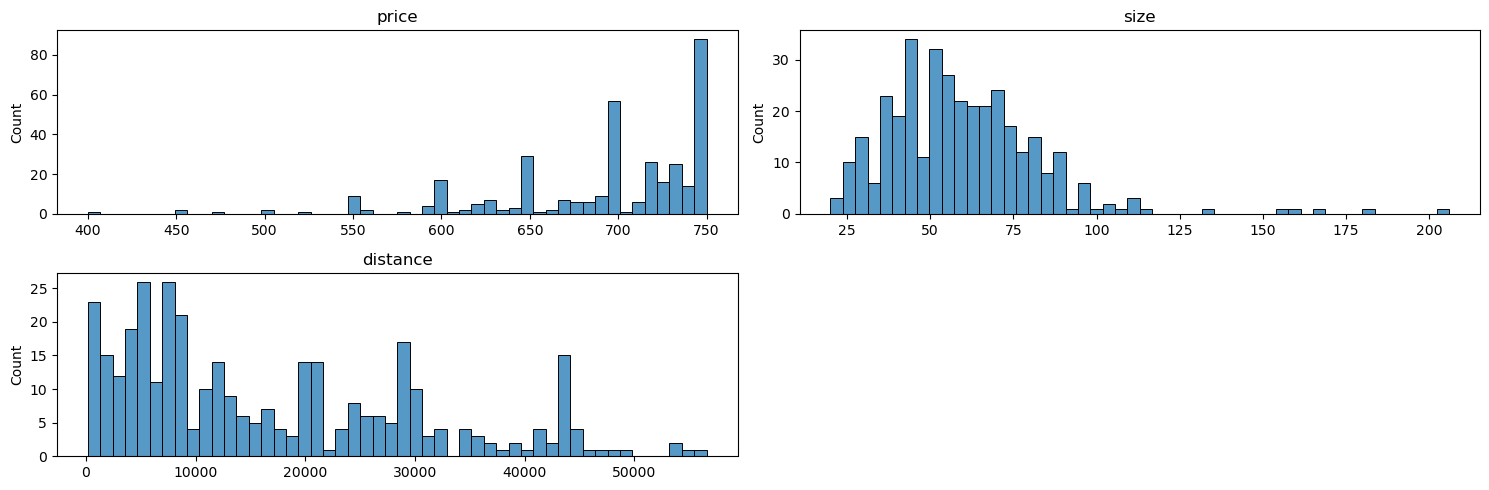

In [79]:
sf.plot_numericas(df_num)

Observaciones:
- Se puede apreciar en la primera gráfica que hay dos picos predominantes, uno en 700 y otro en 750. Destacando que los precios por debajo de 700 son los menos presentes.
- La mayor parte de los datos se encuentran entre 25 y 100 metros. Más adelante, se pueden observar datos menos presentes en tamaños mayores.
- En relación a la distancia, hay una predominancia en los valores por debajo de 10,000 metros. A partir de esta, los datos se distribuyen sin seguir ningún patrón específico.

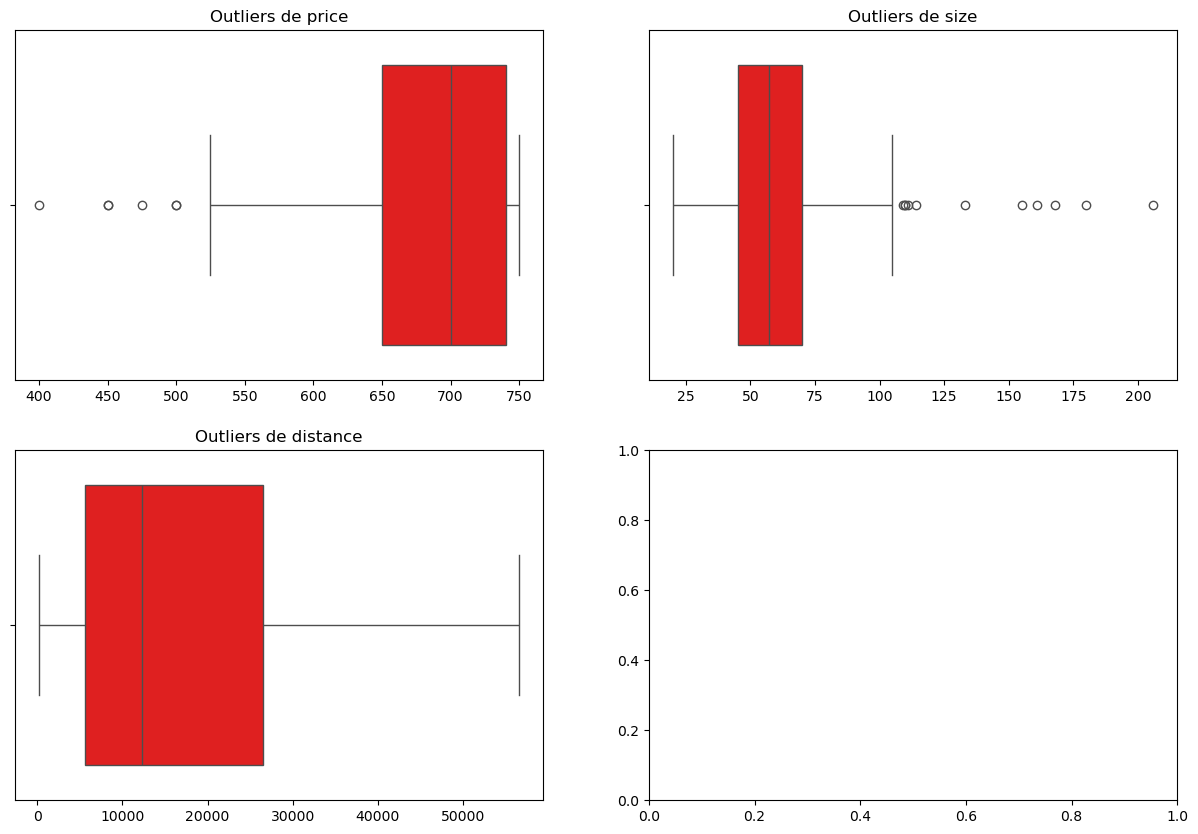

In [80]:
sf.detectar_outliers(df)

Outliers:
- En cuanto a precio, se muestran algunos pocos valores por debajo de 500€ como outliers.
- En cuanto a tamaño, hay una clara concentración entre 25 y 100 m2. Por encima de ahí, se presentan outliers.
- No hay ningún outlier.

c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:164: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:164: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,


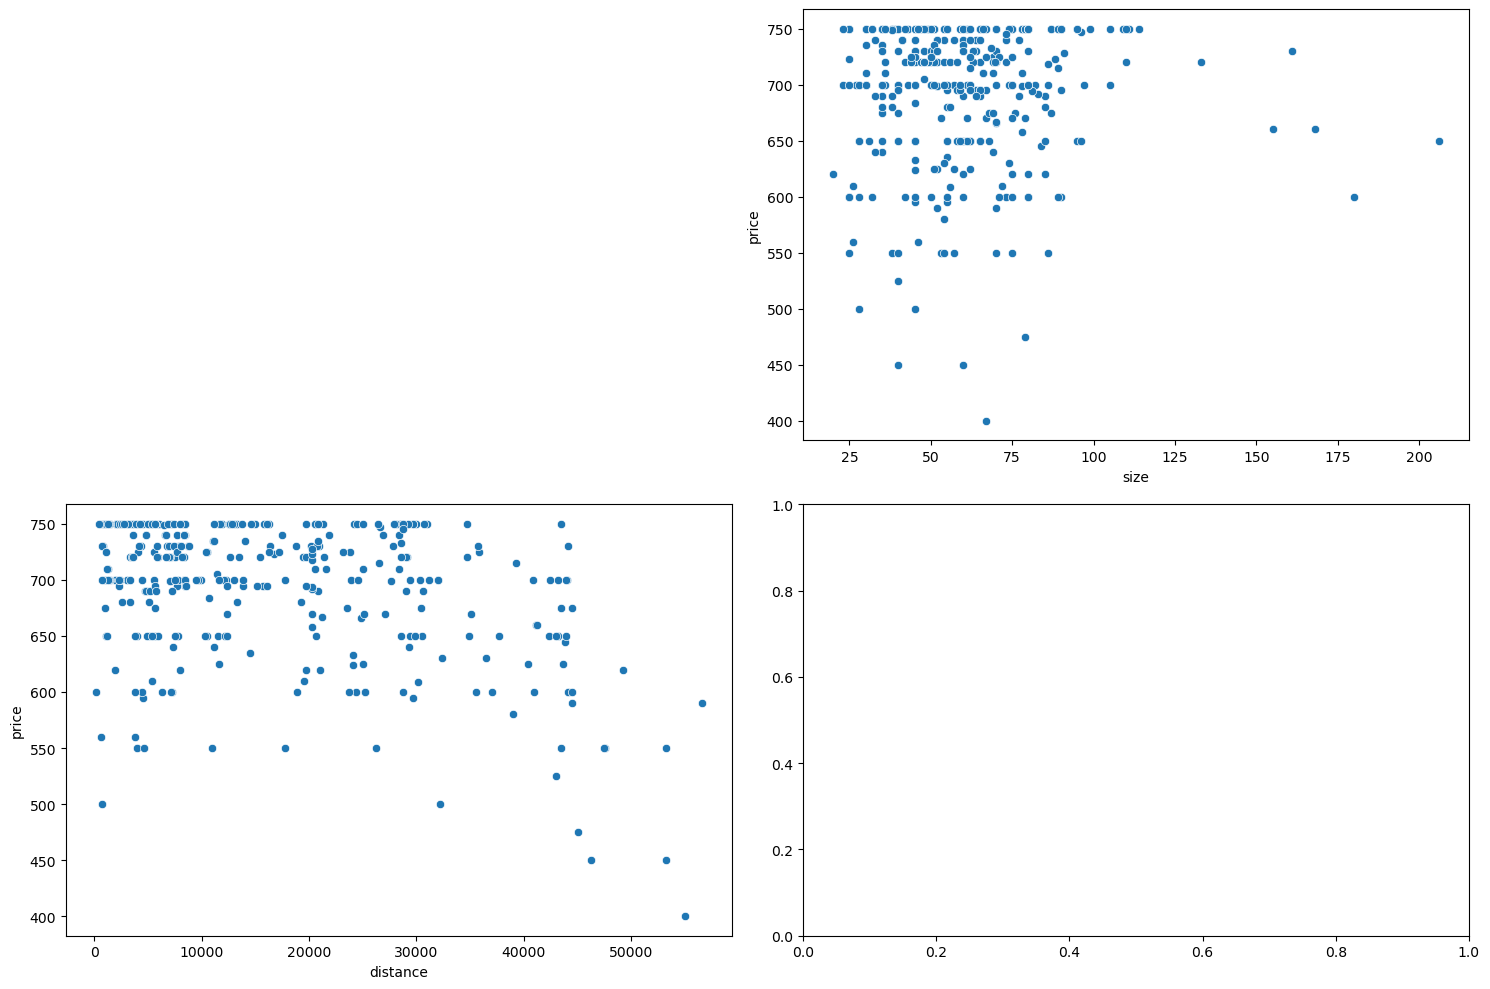

In [81]:
sf.relacion_numericas(df, 'price')

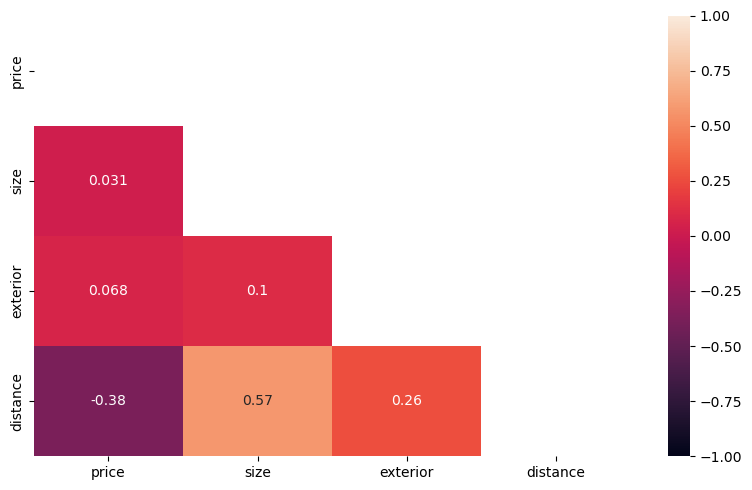

In [86]:
sf.matriz_correacion(df)

Index(['propertyType', 'rooms', 'bathrooms', 'municipality', 'status', 'floor',
       'district', 'hasLift'],
      dtype='object')


c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna,
c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna,
c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna,
c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\

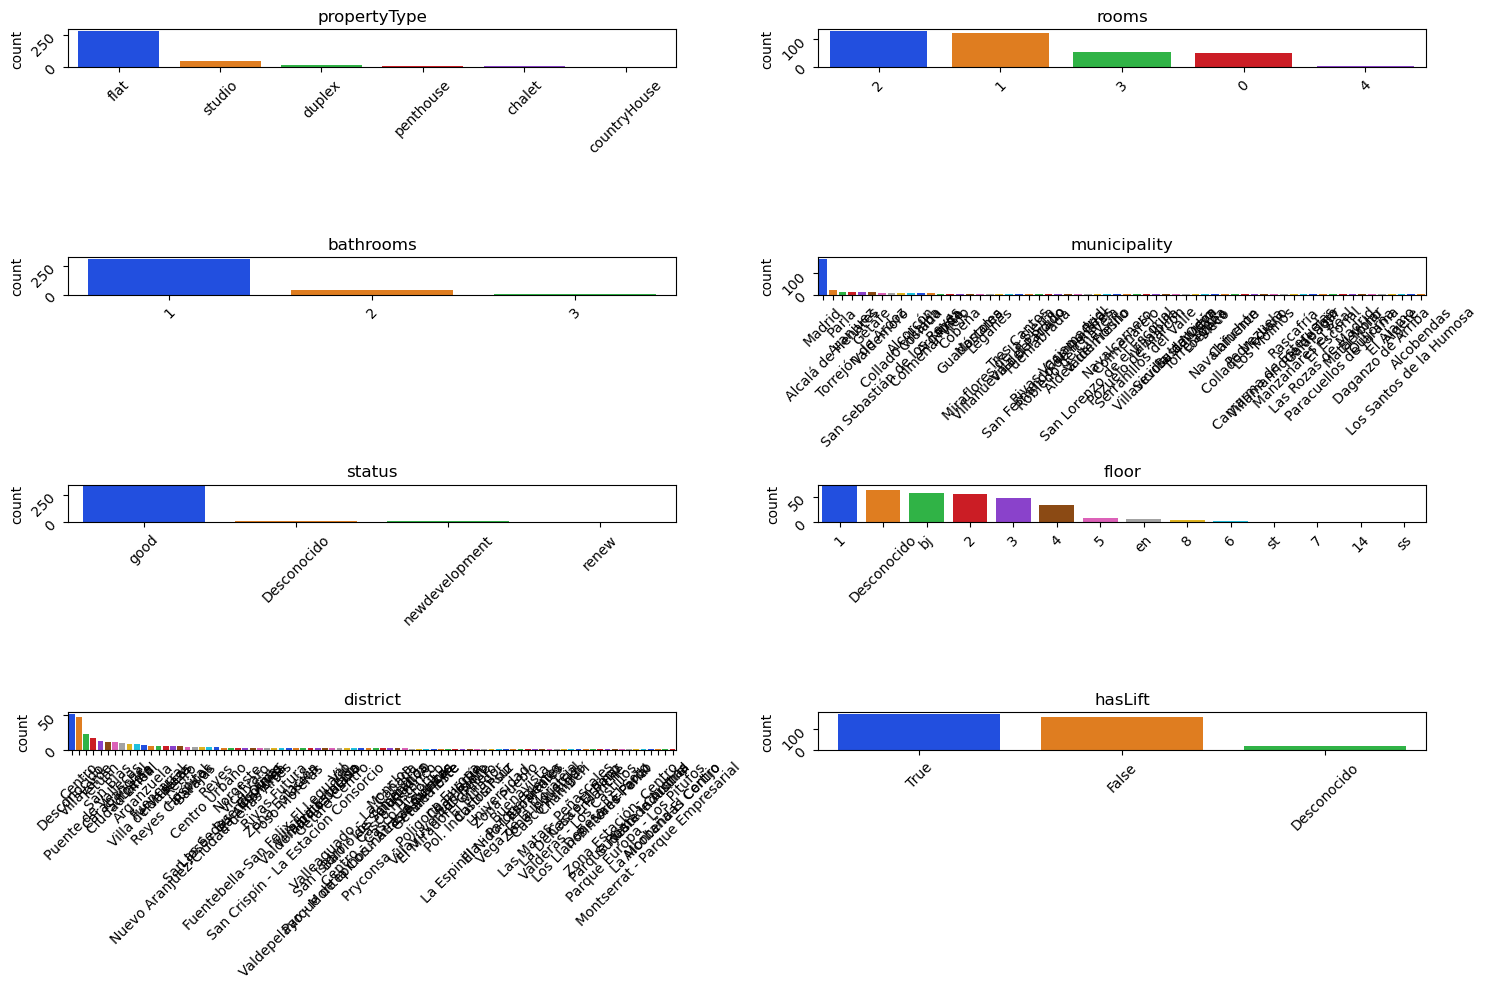

In [82]:
sf.plot_categoricas(df_cat)

,propertyType,price
3,flat,697.559567
5,studio,689.625000
2,duplex,689.285714
4,penthouse,619.900000
0,chalet,610.000000


c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,rooms,price
4,4,713.333333
3,3,705.230769
2,2,697.968750
0,0,690.857143
1,1,682.652893


c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,bathrooms,price
2,3,750.000000
0,1,694.552381
1,2,677.594595


c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,municipality,price
47,San Fernando de Henares,750.0
4,Algete,750.0
50,Serranillos del Valle,750.0
25,Las Rozas de Madrid,750.0
9,Campo Real,750.0


c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,status,price
1,good,695.243827
2,newdevelopment,676.307692
0,Desconocido,662.428571
3,renew,640.000000


c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,floor,price
1,14,750.0
7,7,750.0
13,st,750.0
6,6,725.0
8,8,723.0


c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,district,price
23,Ensanche,750.0
43,Montserrat - Parque Empresarial,750.0
61,San Isidro,750.0
67,Universidad,750.0
20,El Mirador,750.0


c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,hasLift,price
1,True,702.252874
0,False,687.633540
2,Desconocido,650.222222


c:\Users\DELL\Git\Proyecto7---Proyecto-Regresi-n-Lineal\Notebooks\..\src\soporte_funciones.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


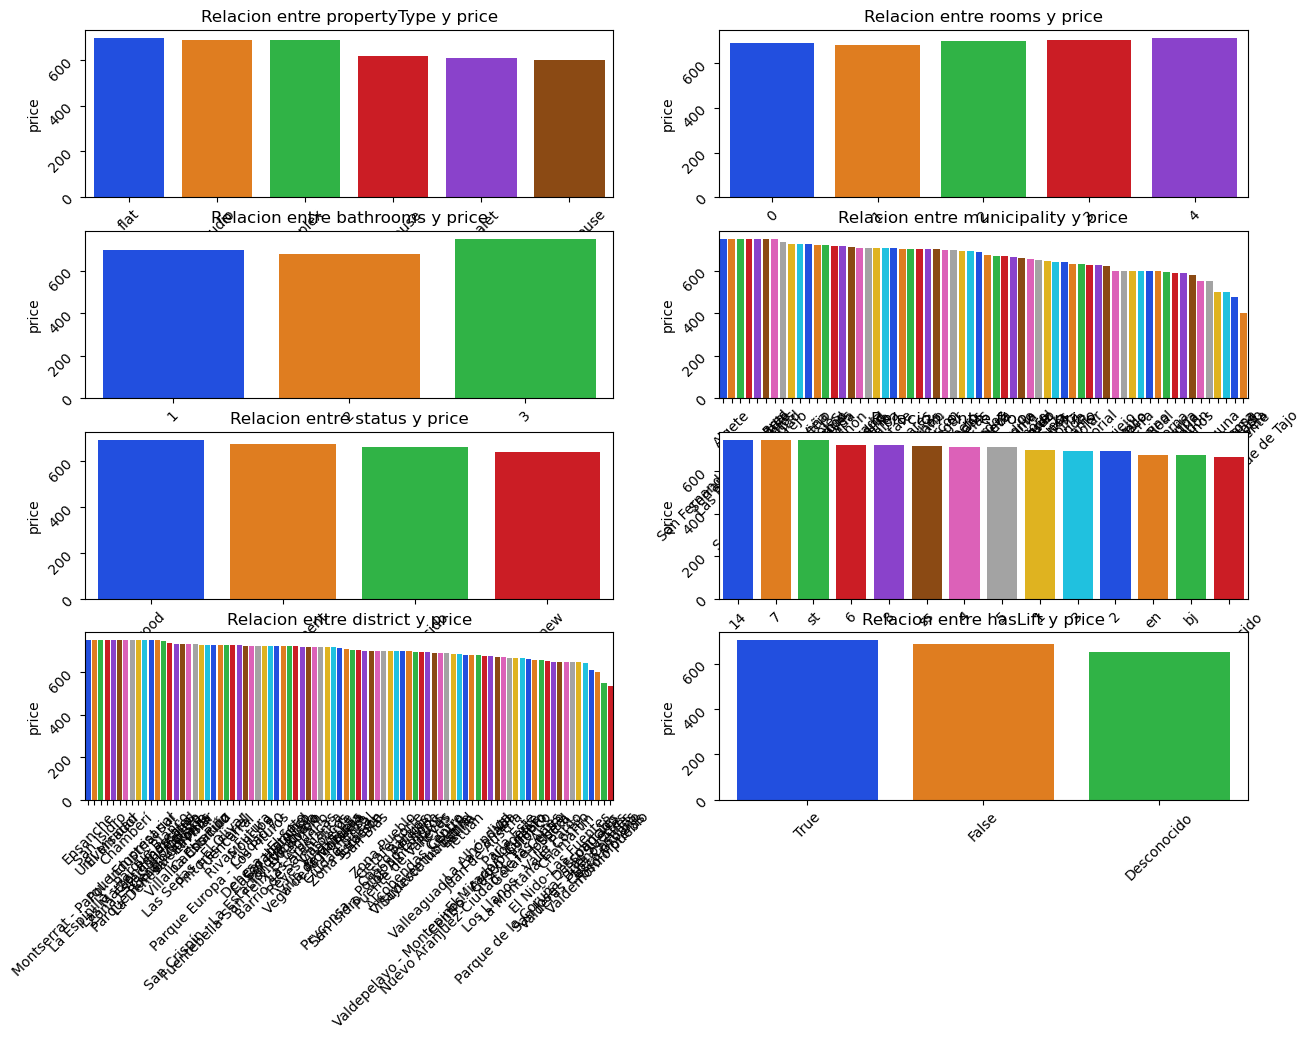

In [83]:
sf.relacion_vr_categoricas(df,'price')

In [84]:
lista_col = df_cat.columns.tolist()

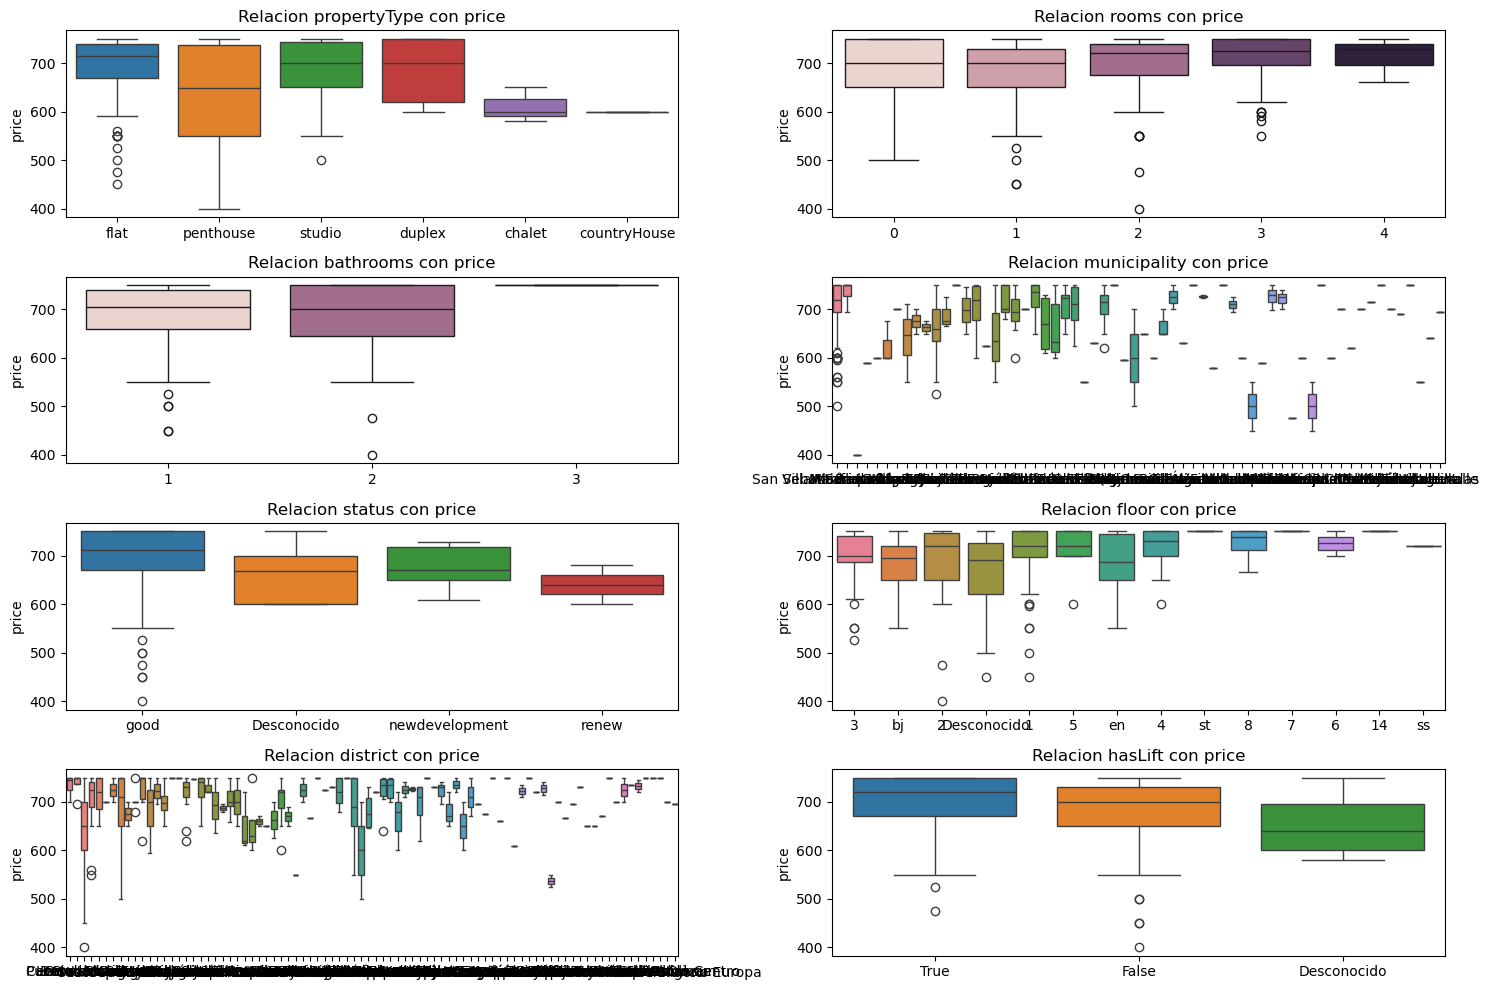

In [85]:
sf.visualizar_categoricas(df,lista_col,'price')